In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1= pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].count()  #.agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
g = df1.groupby('area_type')

In [6]:
for area, area_df in g:
    print (area)
    print (area_df)

Built-up  Area
            area_type   availability               location       size  \
2      Built-up  Area  Ready To Move            Uttarahalli      3 BHK   
13     Built-up  Area  Ready To Move              Gottigere      2 BHK   
20     Built-up  Area  Ready To Move                Kengeri      1 BHK   
27     Built-up  Area         20-Dec             Whitefield      3 BHK   
34     Built-up  Area  Ready To Move          Kasturi Nagar      3 BHK   
...               ...            ...                    ...        ...   
13280  Built-up  Area  Ready To Move               Sarjapur      3 BHK   
13307  Built-up  Area  Ready To Move           Billekahalli      3 BHK   
13308  Built-up  Area  Ready To Move      Bannerghatta Road      3 BHK   
13315  Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
13317  Built-up  Area  Ready To Move  Raja Rajeshwari Nagar      2 BHK   

       society total_sqft  bath  balcony  price  
2          NaN       1440   2.0      3.0   62.

In [7]:
df1.groupby('area_type').agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [8]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3= df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(13246, 5)

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['bhk']= df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\A\AppData\Local\Temp/ipykernel_50752/3603722699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']= df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [20]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
convert_sqft_to_num('2166')

2166.0

In [22]:
convert_sqft_to_num('1804-2273')

2038.5

In [23]:
convert_sqft_to_num('34.456Sq. Meter')

In [24]:
df4 = df3.copy()
df4['total_sqft']= df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(20)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [25]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

# Feature Engineering and Dimensional Analysis

In [26]:
df5= df4.copy()
df5['price_per_sqft']= df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
len(df5.location.unique())

1304

In [28]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [29]:
df5.location = df5.location.apply(lambda x : x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [30]:
df5.location.head(25)

0     Electronic City Phase II
1             Chikka Tirupathi
2                  Uttarahalli
3           Lingadheeranahalli
4                     Kothanur
5                   Whitefield
6             Old Airport Road
7                 Rajaji Nagar
8                 Marathahalli
9                 Gandhi Bazar
10                  Whitefield
11                  Whitefield
12          7th Phase JP Nagar
13                   Gottigere
14                    Sarjapur
15                 Mysore Road
16               Bisuvanahalli
17       Raja Rajeshwari Nagar
18       Ramakrishnappa Layout
19          Manayata Tech Park
20                     Kengeri
21                  Binny Pete
22                 Thanisandra
23                   Bellandur
24                 Thanisandra
Name: location, dtype: object

In [31]:
len(location_stats[location_stats<=10])

1052

In [32]:
location_stats_less_than_10= location_stats[location_stats<=10]
location_stats_less_than_10.head(25)

location
Basapura                   10
1st Block Koramangala      10
Gunjur Palya               10
Kalkere                    10
Sector 1 HSR Layout        10
Dairy Circle               10
Naganathapura              10
Sadashiva Nagar            10
Nagadevanahalli            10
BTM 1st Stage              10
Nagappa Reddy Layout       10
Dodsworth Layout           10
Ganga Nagar                10
2nd Phase JP Nagar          9
Volagerekallahalli          9
Yemlur                      9
4th Block Koramangala       9
Lingarajapuram              9
Medahalli                   9
Kaverappa Layout            9
Gollahalli                  9
Richmond Town               9
Vishwanatha Nagenahalli     9
Chennammana Kere            9
KUDLU MAIN ROAD             9
Name: location, dtype: int64

In [33]:
len(df5.location.unique())

1293

In [34]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [35]:
len(df5.location.unique())

242

In [36]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Detection and Removal

In [37]:
df5[(df5.total_sqft/df5.bhk)<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [38]:
df5.shape

(13246, 7)

In [39]:
df6 = df5[~((df5.total_sqft/df5.bhk)<300)]
df6.shape

(12502, 7)

In [40]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Removing Outliers based on Standard Deviation. Assuming the data to be Normally Distributed.

In [41]:
def remove_std_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out
df7 = remove_std_outliers(df6)
df7.shape

(10241, 7)

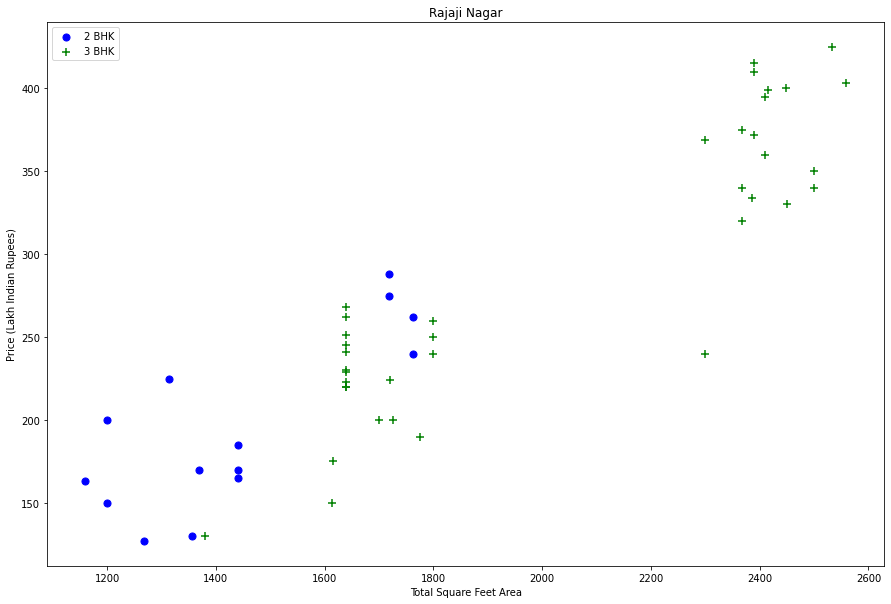

In [43]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [42]:
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


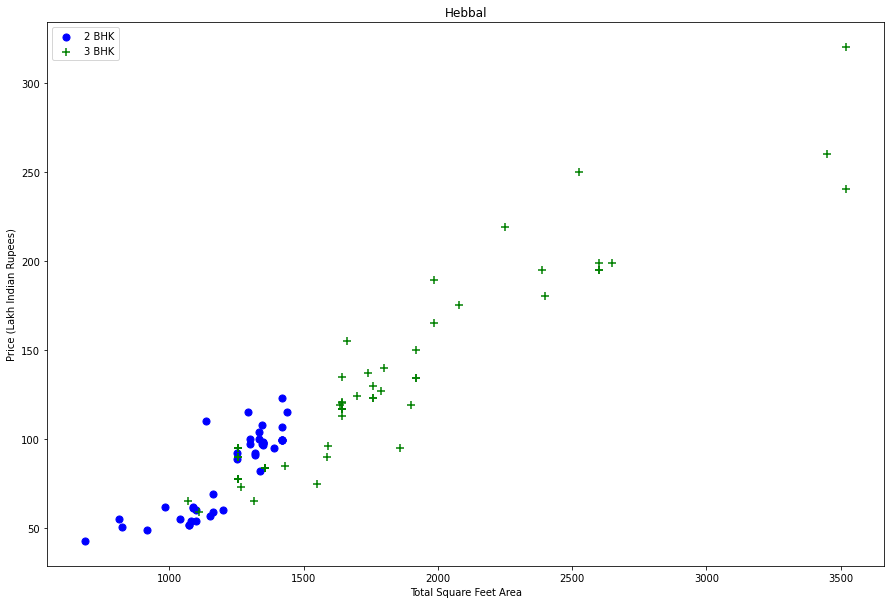

In [44]:
plot_scatter_chart(df7,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [45]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            print(bhk_stats[bhk]['count'])
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

1
3
3
1
8
7
3
1
3
5
4
2
3
1
1
1
2
17
8
2
8
5
1
2
40
57
2
4
22
17
3
1
1
20
9
3
7
1
2
13
1
2
1
17
30
1
10
7
2
5
19
2
1
12
7
14
5
1
4
19
3
6
22
4
1
7
4
2
2
10
7
1
6
3
1
18
12
4
2
6
4
1
14
9
1
1
4
7
1
11
10
2
7
9
28
2
30
27
1
4
6
1
2
4
10
3
1
2
9
3
3
4
1
10
1
1
3
1
4
4
1
5
59
71
8
1
1
6
10
2
5
2
2
9
8
3
9
1
35
28
1
1
52
31
4
4
3
2
8
1
12
13
10
7
6
3
1
6
1
12
31
2
8
4
1
1
19
11
11
7
3
6
19
13
7
1
4
23
22
1
18
8
1
5
3
2
19
37
25
24
9
1
1
4
7
3
2
1
2
1
14
14
12
10
1
3
4
2
5
4
8
3
1
7
2
6
2
6
13
11
1
1
9
5
19
7
1
3
4
6
4
3
14
7
3
3
14
8
3
1
7
8
3
20
179
75
5
3
71
43
4
7
33
19
1
4
16
6
2
6
9
6
2
3
2
4
5
1
2
18
14
3
3
22
4
4
7
2
1
12
8
1
1
2
1
5
6
2
8
4
1
32
11
1
1
81
39
6
31
34
6
43
63
24
4
13
4
3
5
27
1
1
36
9
1
55
70
3
1
1
3
24
20
4
1
1
19
9
1
20
3
1
2
40
12
1
2
19
15
1
4
9
5
2
1
7
8
1
9
12
2
2
3
28
12
4
4
2
1
1
6
1
11
8
2
3
11
15
7
1
1
1
3
20
18
5
1
1
22
27
3
4
12
19
1
2
3
2
19
22
2
5
1
1
2
51
10
2
2
1
1
5
5
1
12
17
2
26
19
3
3
6
5
5
4
1
1
1
13
8
8
5
2
13
7
1
4
1
2
2
15
7
5
11
10
1
20
71
96


(7329, 7)

In [46]:
for key, subdf in df7.groupby('bhk'):
    print(key)
    print(subdf)

1
                 location       size  total_sqft  bath  price  bhk  \
16     1st Phase JP Nagar      1 BHK       840.0   2.0   50.0    1   
56     5th Phase JP Nagar      1 BHK       600.0   1.0   30.0    1   
61     5th Phase JP Nagar      1 BHK       552.0   1.0   23.5    1   
182    7th Phase JP Nagar      1 BHK       750.0   1.0   47.0    1   
184    7th Phase JP Nagar  1 Bedroom      1000.0   1.0   60.0    1   
...                   ...        ...         ...   ...    ...  ...   
10176               other      1 BHK       450.0   1.0   20.0    1   
10181               other      1 BHK       540.0   1.0   22.5    1   
10219               other      1 BHK       530.0   1.0   18.0    1   
10233               other      1 BHK      1800.0   1.0  200.0    1   
10237               other  1 Bedroom       812.0   1.0   26.0    1   

       price_per_sqft  
16        5952.380952  
56        5000.000000  
61        4257.246377  
182       6266.666667  
184       6000.000000  
...          

In [47]:
for key, locdf in df7.groupby('location'):
    for bhk, bhkdf in locdf.groupby('bhk'):
        print(bhkdf)
    

              location   size  total_sqft  bath  price  bhk  price_per_sqft
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668
              location   size  total_sqft  bath  price  bhk  price_per_sqft
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
              location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4    15018.181818
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4    15020.408163
              location   size  total_sqft  bath  price  bhk  price_per_sqft
16  1st Phase JP Nagar  1 BHK       840.0   2.0   50.0    1     5952.380952
              location       size  total_sqft  bath  price  bhk  \
13  1st Phase JP Naga

               location       size  total_sqft  bath   price  bhk  \
92   7th Phase JP Nagar      3 BHK      1420.0   2.0  100.00    3   
93   7th Phase JP Nagar      3 BHK      1850.0   3.0  150.00    3   
96   7th Phase JP Nagar      3 BHK      1400.0   2.0   95.00    3   
97   7th Phase JP Nagar      3 BHK      2225.0   3.0  160.00    3   
101  7th Phase JP Nagar      3 BHK      1450.0   2.0  100.00    3   
103  7th Phase JP Nagar      3 BHK      1420.0   2.0   96.00    3   
104  7th Phase JP Nagar      3 BHK      1680.0   3.0  120.00    3   
107  7th Phase JP Nagar      3 BHK      1050.0   2.0   57.00    3   
108  7th Phase JP Nagar      3 BHK      1343.0   2.0   56.41    3   
109  7th Phase JP Nagar      3 BHK      1405.0   2.0   59.01    3   
110  7th Phase JP Nagar      3 BHK      1400.0   3.0  115.00    3   
114  7th Phase JP Nagar      3 BHK      2200.0   3.0  190.00    3   
115  7th Phase JP Nagar      3 BHK      1250.0   3.0   65.00    3   
116  7th Phase JP Nagar      3 BHK

231     4335.260116  
               location   size  total_sqft  bath  price  bhk  price_per_sqft
251  9th Phase JP Nagar  1 BHK       600.0   1.0   20.0    1     3333.333333
               location       size  total_sqft  bath  price  bhk  \
238  9th Phase JP Nagar      2 BHK     1005.00   2.0  50.00    2   
240  9th Phase JP Nagar      2 BHK     1100.00   2.0  65.00    2   
241  9th Phase JP Nagar      2 BHK     1080.00   2.0  37.00    2   
242  9th Phase JP Nagar      2 BHK     1035.00   2.0  45.00    2   
244  9th Phase JP Nagar      2 BHK     1164.00   2.0  56.00    2   
245  9th Phase JP Nagar      2 BHK     1005.00   2.0  42.00    2   
246  9th Phase JP Nagar      2 BHK     1127.00   2.0  50.00    2   
247  9th Phase JP Nagar      2 BHK     1005.00   2.0  43.00    2   
248  9th Phase JP Nagar      2 BHK      835.00   2.0  37.00    2   
249  9th Phase JP Nagar      2 BHK     1050.00   2.0  39.00    2   
250  9th Phase JP Nagar      2 BHK      660.00   2.0  27.00    2   
252  9th

409  Amruthahalli  2 BHK      1025.0   2.0   42.0    2     4097.560976
         location       size  total_sqft  bath  price  bhk  price_per_sqft
393  Amruthahalli  3 Bedroom      1900.0   3.0  135.0    3     7105.263158
398  Amruthahalli      3 BHK      1350.0   2.0   63.0    3     4666.666667
399  Amruthahalli      3 BHK      1605.0   3.0   65.0    3     4049.844237
400  Amruthahalli      3 BHK      1700.0   3.0   77.0    3     4529.411765
401  Amruthahalli      3 BHK      1450.0   2.0   85.0    3     5862.068966
407  Amruthahalli      3 BHK      2650.0   4.0  175.0    3     6603.773585
408  Amruthahalli      3 BHK      1450.0   2.0   90.0    3     6206.896552
       location       size  total_sqft  bath  price  bhk  price_per_sqft
411  Anandapura      2 BHK      1167.0   2.0  43.76    2     3749.785775
412  Anandapura  2 Bedroom      1000.0   2.0  55.00    2     5500.000000
413  Anandapura      2 BHK      1141.0   2.0  42.79    2     3750.219106
415  Anandapura  2 Bedroom      1200.

518  Ardendale  2 BHK      1224.0   2.0   67.0    2     5473.856209
      location   size  total_sqft  bath  price  bhk  price_per_sqft
503  Ardendale  3 BHK     1750.00   3.0  100.0    3     5714.285714
506  Ardendale  3 BHK     1750.00   3.0  100.0    3     5714.285714
508  Ardendale  3 BHK     1728.00   3.0   95.0    3     5497.685185
510  Ardendale  3 BHK     1732.46   3.0   92.0    3     5310.367916
514  Ardendale  3 BHK     1777.26   3.0  105.0    3     5907.970696
515  Ardendale  3 BHK     1650.00   3.0   82.0    3     4969.696970
517  Ardendale  3 BHK     1650.00   3.0   82.0    3     4969.696970
519  Ardendale  3 BHK     1723.00   3.0   95.0    3     5513.639002
520  Ardendale  3 BHK     1777.26   3.0   89.0    3     5007.708495
521  Ardendale  3 BHK     1777.26   3.0   92.0    3     5176.507658
      location       size  total_sqft  bath  price  bhk  price_per_sqft
504  Ardendale      4 BHK      3198.0   4.0  200.0    4     6253.908693
505  Ardendale      4 BHK      2422.0   

615  BTM Layout  2 BHK      1196.0   2.0  56.81    2     4750.000000
       location   size  total_sqft  bath  price  bhk  price_per_sqft
606  BTM Layout  3 BHK      1450.0   2.0   81.0    3     5586.206897
607  BTM Layout  3 BHK      1776.0   2.0   75.0    3     4222.972973
608  BTM Layout  3 BHK      1458.0   3.0   79.0    3     5418.381344
611  BTM Layout  3 BHK      1600.0   3.0  112.0    3     7000.000000
612  BTM Layout  3 BHK      1300.0   2.0   75.0    3     5769.230769
613  BTM Layout  3 BHK      1540.0   2.0   78.0    3     5064.935065
616  BTM Layout  3 BHK      1470.0   2.0   99.0    3     6734.693878
       location       size  total_sqft  bath  price  bhk  price_per_sqft
605  BTM Layout  6 Bedroom      3300.0   6.0  165.0    6          5000.0
         location   size  total_sqft  bath  price  bhk  price_per_sqft
622  Babusapalaya  2 BHK      1141.0   2.0  46.00    2     4031.551271
623  Babusapalaya  2 BHK      1500.0   2.0  57.00    2     3800.000000
625  Babusapalaya  2

743  Banashankari  3 BHK      1426.0   3.0   85.00    3     5960.729313
         location   size  total_sqft  bath  price  bhk  price_per_sqft
696  Banashankari  4 BHK      2500.0   4.0   95.0    4          3800.0
                  location   size  total_sqft  bath  price  bhk  \
744  Banashankari Stage II  2 BHK      1700.0   2.0  150.0    2   
749  Banashankari Stage II  2 BHK      1250.0   2.0  110.0    2   
752  Banashankari Stage II  2 BHK      1400.0   2.0  100.0    2   
756  Banashankari Stage II  2 BHK      1245.0   2.0  125.0    2   

     price_per_sqft  
744     8823.529412  
749     8800.000000  
752     7142.857143  
756    10040.160643  
                  location       size  total_sqft  bath   price  bhk  \
746  Banashankari Stage II      3 BHK      1500.0   2.0  120.00    3   
748  Banashankari Stage II      3 BHK      1240.0   2.0   59.52    3   
750  Banashankari Stage II      3 BHK      1260.0   2.0   95.00    3   
751  Banashankari Stage II  3 Bedroom      2400.0   

              location   size  total_sqft  bath   price  bhk  price_per_sqft
823  Bannerghatta Road  2 BHK      1050.0   2.0  65.000    2     6190.476190
831  Bannerghatta Road  2 BHK      1179.0   2.0  66.020    2     5599.660729
832  Bannerghatta Road  2 BHK      1122.5   2.0  58.935    2     5250.334076
833  Bannerghatta Road  2 BHK       793.0   2.0  45.000    2     5674.653216
835  Bannerghatta Road  2 BHK      1400.0   2.0  78.000    2     5571.428571
837  Bannerghatta Road  2 BHK      1215.0   2.0  50.000    2     4115.226337
839  Bannerghatta Road  2 BHK      1181.0   2.0  55.000    2     4657.070279
841  Bannerghatta Road  2 BHK      1200.0   2.0  75.000    2     6250.000000
844  Bannerghatta Road  2 BHK      1105.0   2.0  51.000    2     4615.384615
845  Bannerghatta Road  2 BHK      1255.0   2.0  65.260    2     5200.000000
850  Bannerghatta Road  2 BHK       912.0   2.0  55.000    2     6030.701754
851  Bannerghatta Road  2 BHK      1218.0   2.0  73.000    2     5993.431856

1087  Begur Road      3 BHK      1410.0   2.0  54.99    3     3900.000000
        location   size  total_sqft  bath  price  bhk  price_per_sqft
1068  Begur Road  4 BHK      2464.5   6.0  118.0    4      4787.98945
       location   size  total_sqft  bath  price  bhk  price_per_sqft
1164  Bellandur  1 BHK       950.0   1.0   40.0    1     4210.526316
       location   size  total_sqft  bath  price  bhk  price_per_sqft
1089  Bellandur  2 BHK      1205.0   2.0  66.00    2     5477.178423
1090  Bellandur  2 BHK      1250.0   2.0  76.00    2     6080.000000
1091  Bellandur  2 BHK      1000.0   2.0  50.00    2     5000.000000
1092  Bellandur  2 BHK      1281.0   2.0  74.00    2     5776.736924
1093  Bellandur  2 BHK       921.0   2.0  40.00    2     4343.105320
1100  Bellandur  2 BHK      1220.0   2.0  60.00    2     4918.032787
1101  Bellandur  2 BHK      1299.0   2.0  82.00    2     6312.548114
1102  Bellandur  2 BHK       900.0   2.0  56.00    2     6222.222222
1103  Bellandur  2 BHK     

1228  Bhoganhalli  3 BHK      1703.0   3.0  120.00    3     7046.388726
         location   size  total_sqft  bath  price  bhk  price_per_sqft
1195  Bhoganhalli  4 BHK      2119.0   4.0  111.0    4     5238.319962
1202  Bhoganhalli  4 BHK      1974.0   4.0  106.0    4     5369.807497
1203  Bhoganhalli  4 BHK      2171.0   4.0  111.0    4     5112.851221
1205  Bhoganhalli  4 BHK      2119.0   4.0  111.0    4     5238.319962
1210  Bhoganhalli  4 BHK      2439.0   4.0  185.0    4     7585.075851
1212  Bhoganhalli  4 BHK      2119.0   4.0  111.0    4     5238.319962
1217  Bhoganhalli  4 BHK      2439.0   5.0  170.0    4     6970.069701
1218  Bhoganhalli  4 BHK      2119.0   4.0  111.0    4     5238.319962
1221  Bhoganhalli  4 BHK      2439.0   4.0  170.0    4     6970.069701
1227  Bhoganhalli  4 BHK      2119.0   4.0  111.0    4     5238.319962
          location   size  total_sqft  bath   price  bhk  price_per_sqft
1230  Billekahalli  2 BHK      1125.0   2.0   62.00    2     5511.111111
1

1340  Bommasandra  2 BHK      1089.0   2.0  40.00    2     3673.094582
         location       size  total_sqft  bath  price  bhk  price_per_sqft
1312  Bommasandra      3 BHK      1260.0   3.0  49.36    3     3917.460317
1313  Bommasandra      3 BHK      1200.0   3.0  46.00    3     3833.333333
1320  Bommasandra      3 BHK      1295.0   2.0  50.28    3     3882.625483
1321  Bommasandra      3 BHK      1478.0   2.0  44.00    3     2976.995940
1330  Bommasandra      3 BHK      1280.0   3.0  50.00    3     3906.250000
1331  Bommasandra  3 Bedroom      1942.0   3.0  90.00    3     4634.397528
1333  Bommasandra      3 BHK      1400.0   2.0  45.00    3     3214.285714
1335  Bommasandra      3 BHK      1365.0   3.0  52.81    3     3868.864469
1337  Bommasandra      3 BHK      1260.0   3.0  49.36    3     3917.460317
1338  Bommasandra      3 BHK      1365.0   3.0  52.82    3     3869.597070
1341  Bommasandra      3 BHK      1365.0   3.0  53.96    3     3953.113553
                         loca

1478  CV Raman Nagar  1 BHK       705.0   2.0   50.0    1     7092.198582
            location   size  total_sqft  bath  price  bhk  price_per_sqft
1459  CV Raman Nagar  2 BHK      1120.0   2.0   55.0    2     4910.714286
1460  CV Raman Nagar  2 BHK      1070.0   2.0   55.0    2     5140.186916
1461  CV Raman Nagar  2 BHK       740.0   2.0   37.0    2     5000.000000
1462  CV Raman Nagar  2 BHK      1028.0   2.0   49.0    2     4766.536965
1463  CV Raman Nagar  2 BHK      1392.0   2.0   98.0    2     7040.229885
1464  CV Raman Nagar  2 BHK      1070.0   2.0   47.5    2     4439.252336
1466  CV Raman Nagar  2 BHK      1025.0   2.0   50.0    2     4878.048780
1468  CV Raman Nagar  2 BHK      1198.0   2.0   60.0    2     5008.347245
1469  CV Raman Nagar  2 BHK      1560.0   2.0   85.0    2     5448.717949
1471  CV Raman Nagar  2 BHK      1100.0   2.0   58.0    2     5272.727273
1472  CV Raman Nagar  2 BHK      1051.0   2.0   61.0    2     5803.996194
1474  CV Raman Nagar  2 BHK      1020.

1611  Channasandra      2 BHK      1010.0   2.0  32.00    2     3168.316832
          location       size  total_sqft  bath  price  bhk  price_per_sqft
1577  Channasandra      3 BHK      1340.0   2.0  48.33    3     3606.716418
1580  Channasandra      3 BHK      1470.0   2.0  90.00    3     6122.448980
1585  Channasandra  3 Bedroom      1200.0   3.0  67.77    3     5647.500000
1590  Channasandra      3 BHK      1310.0   2.0  45.00    3     3435.114504
1599  Channasandra      3 BHK      1330.0   2.0  51.83    3     3896.992481
1602  Channasandra  3 Bedroom      1500.0   3.0  61.95    3     4130.000000
1603  Channasandra      3 BHK      1800.0   3.0  60.00    3     3333.333333
1605  Channasandra  3 Bedroom      1200.0   3.0  67.77    3     5647.500000
1606  Channasandra      3 BHK      1195.0   2.0  56.00    3     4686.192469
          location       size  total_sqft  bath  price  bhk  price_per_sqft
1598  Channasandra  4 Bedroom      1500.0   4.0  89.45    4     5963.333333
          lo

1710    24000.000000  
        location   size  total_sqft  bath  price  bhk  price_per_sqft
1720  Dasanapura  1 BHK       708.0   1.0   41.0    1     5790.960452
        location   size  total_sqft  bath  price  bhk  price_per_sqft
1712  Dasanapura  2 BHK       708.0   2.0  37.00    2     5225.988701
1713  Dasanapura  2 BHK       708.0   1.0  40.00    2     5649.717514
1714  Dasanapura  2 BHK       965.0   2.0  42.50    2     4404.145078
1716  Dasanapura  2 BHK       814.0   2.0  42.00    2     5159.705160
1717  Dasanapura  2 BHK      1163.0   2.0  65.00    2     5588.993981
1719  Dasanapura  2 BHK       708.0   2.0  31.15    2     4399.717514
1721  Dasanapura  2 BHK       814.0   2.0  43.70    2     5368.550369
        location   size  total_sqft  bath  price  bhk  price_per_sqft
1715  Dasanapura  3 BHK      1286.0   3.0  61.44    3     4777.604977
1718  Dasanapura  3 BHK      1286.0   2.0  68.00    3     5287.713841
         location   size  total_sqft  bath  price  bhk  price_per_s

1843  Doddathoguru  1 BHK       550.0   1.0   17.0    1     3090.909091
          location   size  total_sqft  bath  price  bhk  price_per_sqft
1820  Doddathoguru  2 BHK       970.0   2.0   33.0    2     3402.061856
1821  Doddathoguru  2 BHK      1050.0   2.0   32.0    2     3047.619048
1822  Doddathoguru  2 BHK       850.0   2.0   25.0    2     2941.176471
1823  Doddathoguru  2 BHK      1030.0   2.0   42.0    2     4077.669903
1827  Doddathoguru  2 BHK      1015.0   2.0   33.5    2     3300.492611
1828  Doddathoguru  2 BHK      1104.0   2.0   39.0    2     3532.608696
1829  Doddathoguru  2 BHK       915.0   2.0   32.0    2     3497.267760
1832  Doddathoguru  2 BHK       855.0   2.0   32.0    2     3742.690058
1833  Doddathoguru  2 BHK      1105.0   2.0   50.0    2     4524.886878
1834  Doddathoguru  2 BHK       925.0   2.0   30.0    2     3243.243243
1837  Doddathoguru  2 BHK      1100.0   2.0   50.0    2     4545.454545
1838  Doddathoguru  2 BHK       940.0   2.0   32.9    2     3500

2271     4800.000000  
                      location   size  total_sqft  bath  price  bhk  \
2313  Electronics City Phase 1  1 BHK       755.0   1.0  42.41    1   
2314  Electronics City Phase 1  1 BHK       580.0   1.0  27.00    1   
2322  Electronics City Phase 1  1 BHK       635.0   1.0  26.00    1   
2326  Electronics City Phase 1   1 RK       360.0   1.0  16.90    1   
2327  Electronics City Phase 1  1 BHK       638.0   1.0  32.00    1   
2329  Electronics City Phase 1  1 BHK       585.0   1.0  21.00    1   
2351  Electronics City Phase 1  1 BHK       755.0   1.0  30.12    1   

      price_per_sqft  
2313     5617.218543  
2314     4655.172414  
2322     4094.488189  
2326     4694.444444  
2327     5015.673981  
2329     3589.743590  
2351     3989.403974  
                      location   size  total_sqft  bath  price  bhk  \
2294  Electronics City Phase 1  2 BHK     1070.00   2.0  45.50    2   
2297  Electronics City Phase 1  2 BHK     1113.27   2.0  53.00    2   
2299  Elect

2418     4248.861912  
                    location   size  total_sqft  bath  price  bhk  \
2417  Gollarapalya Hosahalli  4 BHK      1905.0   3.0   86.0    4   

      price_per_sqft  
2417     4514.435696  
       location       size  total_sqft  bath  price  bhk  price_per_sqft
2428  Gottigere  1 Bedroom       812.0   1.0   26.0    1     3201.970443
2433  Gottigere  1 Bedroom       812.0   1.0   26.0    1     3201.970443
       location   size  total_sqft  bath  price  bhk  price_per_sqft
2420  Gottigere  2 BHK      1100.0   2.0  40.00    2     3636.363636
2421  Gottigere  2 BHK       967.0   2.0  45.00    2     4653.567735
2423  Gottigere  2 BHK      1222.0   2.0  63.00    2     5155.482815
2426  Gottigere  2 BHK       950.0   2.0  38.00    2     4000.000000
2427  Gottigere  2 BHK      1153.0   2.0  48.50    2     4206.418040
2434  Gottigere  2 BHK       990.0   2.0  40.00    2     4040.404040
2435  Gottigere  2 BHK      1235.0   2.0  63.00    2     5101.214575
2437  Gottigere  2 BH

2503   Gunjur  4 Bedroom      2000.0   3.0   95.0    4          4750.0
           location       size  total_sqft  bath  price  bhk  price_per_sqft
2522  HAL 2nd Stage  2 Bedroom       600.0   3.0  145.0    2    24166.666667
           location       size  total_sqft  bath  price  bhk  price_per_sqft
2521  HAL 2nd Stage      3 BHK      1490.0   2.0  300.0    3    20134.228188
2523  HAL 2nd Stage  3 Bedroom      2700.0   3.0  500.0    3    18518.518519
           location       size  total_sqft  bath  price  bhk  price_per_sqft
2524  HAL 2nd Stage  5 Bedroom      2040.0   4.0  500.0    5    24509.803922
        location       size  total_sqft  bath  price  bhk  price_per_sqft
2528  HBR Layout      2 BHK      1200.0   2.0   60.0    2     5000.000000
2529  HBR Layout      2 BHK      1004.0   2.0   49.0    2     4880.478088
2532  HBR Layout      2 BHK      1089.0   2.0   60.0    2     5509.641873
2534  HBR Layout      2 BHK      1198.0   2.0   65.0    2     5425.709516
2536  HBR Layout  2 

2980  Hegde Nagar  3 BHK     1348.00   2.0   80.5    3     5971.810089
         location       size  total_sqft  bath  price  bhk  price_per_sqft
2954  Hegde Nagar  4 Bedroom      1200.0   4.0   83.0    4     6916.666667
         location       size  total_sqft  bath  price  bhk  price_per_sqft
2948  Hegde Nagar  6 Bedroom      3000.0   7.0  210.0    6          7000.0
     location   size  total_sqft  bath  price  bhk  price_per_sqft
2981   Hennur  2 BHK      1075.0   2.0  52.00    2     4837.209302
2982   Hennur  2 BHK      1255.0   2.0  52.32    2     4168.924303
2983   Hennur  2 BHK      1225.0   2.0  57.00    2     4653.061224
2984   Hennur  2 BHK      1255.0   2.0  57.50    2     4581.673307
2985   Hennur  2 BHK      1259.0   2.0  57.00    2     4527.402701
2986   Hennur  2 BHK      1255.0   2.0  53.50    2     4262.948207
2987   Hennur  2 BHK      1285.0   2.0  60.00    2     4669.260700
2988   Hennur  2 BHK      1285.0   2.0  60.00    2     4669.260700
2989   Hennur  2 BHK      

3130  Hennur Road  4 Bedroom      1880.0   4.0  154.0    4     8191.489362
         location       size  total_sqft  bath  price  bhk  price_per_sqft
3101  Hennur Road  5 Bedroom      5100.0   6.0  375.0    5     7352.941176
         location       size  total_sqft  bath  price  bhk  price_per_sqft
3028  Hennur Road  8 Bedroom      5000.0   8.0  250.0    8          5000.0
     location   size  total_sqft  bath  price  bhk  price_per_sqft
3179    Hoodi  1 BHK       706.0   1.0  48.24    1     6832.861190
3194    Hoodi  1 BHK       711.0   1.0  42.65    1     5998.593530
3196    Hoodi  1 BHK       863.0   1.0  40.55    1     4698.725377
     location   size  total_sqft  bath   price  bhk  price_per_sqft
3157    Hoodi  2 BHK       985.0   2.0  67.000    2     6802.030457
3160    Hoodi  2 BHK      1425.0   2.0  80.000    2     5614.035088
3161    Hoodi  2 BHK      1420.0   2.0  75.000    2     5281.690141
3168    Hoodi  2 BHK      1026.0   2.0  60.870    2     5932.748538
3169    Hoodi  2 

3353  Hosa Road      3 BHK      1541.0   3.0   69.61    3     4517.196626
       location   size  total_sqft  bath  price  bhk  price_per_sqft
3351  Hosa Road  4 BHK      1708.0   3.0  64.05    4          3750.0
           location       size  total_sqft  bath   price  bhk  price_per_sqft
3362  Hosakerehalli      2 BHK      1304.0   2.0  100.00    2     7668.711656
3364  Hosakerehalli      2 BHK       925.0   2.0   46.50    2     5027.027027
3370  Hosakerehalli  2 Bedroom       600.0   2.0   65.00    2    10833.333333
3372  Hosakerehalli      2 BHK       925.0   2.0   46.25    2     5000.000000
           location       size  total_sqft  bath  price  bhk  price_per_sqft
3355  Hosakerehalli      3 BHK      2378.0   3.0  262.0    3    11017.661901
3356  Hosakerehalli      3 BHK      2376.0   3.0  203.0    3     8543.771044
3361  Hosakerehalli      3 BHK      1817.0   4.0  153.0    3     8420.473308
3363  Hosakerehalli      3 BHK      2480.0   3.0  245.0    3     9879.032258
3365  Hosaker

3462  Hulimavu  3 BHK      1916.0   2.0  150.0    3     7828.810021
      location       size  total_sqft  bath  price  bhk  price_per_sqft
3427  Hulimavu  4 Bedroom      1200.0   4.0   75.0    4      6250.00000
3447  Hulimavu  4 Bedroom      2000.0   4.0  100.0    4      5000.00000
3448  Hulimavu      4 BHK      3560.0   5.0  318.0    4      8932.58427
3458  Hulimavu  4 Bedroom      1200.0   4.0   75.0    4      6250.00000
         location   size  total_sqft  bath  price  bhk  price_per_sqft
3465  ISRO Layout  2 BHK      1000.0   2.0   60.0    2     6000.000000
3466  ISRO Layout  2 BHK      1180.0   2.0   52.0    2     4406.779661
3467  ISRO Layout  2 BHK      1000.0   2.0   60.0    2     6000.000000
3470  ISRO Layout  2 BHK      1050.0   2.0   51.0    2     4857.142857
         location   size  total_sqft  bath  price  bhk  price_per_sqft
3468  ISRO Layout  3 BHK      1310.0   2.0   68.0    3     5190.839695
3471  ISRO Layout  3 BHK      1370.0   2.0   87.0    3     6350.364964
    

3636   Jakkur  2 BHK     1432.00   2.0   85.000    2     5935.754190
     location   size  total_sqft  bath   price  bhk  price_per_sqft
3588   Jakkur  3 BHK      1590.0   2.0  125.00    3     7861.635220
3590   Jakkur  3 BHK      1710.0   3.0  107.00    3     6257.309942
3591   Jakkur  3 BHK      1396.0   2.0   86.51    3     6196.991404
3593   Jakkur  3 BHK      1865.0   3.0  124.00    3     6648.793566
3595   Jakkur  3 BHK      1760.0   3.0  139.00    3     7897.727273
3598   Jakkur  3 BHK      1798.0   3.0  120.00    3     6674.082314
3601   Jakkur  3 BHK      1950.0   3.0  131.00    3     6717.948718
3602   Jakkur  3 BHK      1858.0   3.0   98.30    3     5290.635091
3604   Jakkur  3 BHK      1374.0   3.0   68.00    3     4949.053857
3606   Jakkur  3 BHK      1760.0   3.0  110.00    3     6250.000000
3609   Jakkur  3 BHK      1482.0   3.0   86.00    3     5802.968961
3610   Jakkur  3 BHK      1645.0   3.0  100.00    3     6079.027356
3611   Jakkur  3 BHK      1650.0   3.0  111.00 

3767  KR Puram  6 Bedroom      4300.0   6.0  175.0    6     4069.767442
      location       size  total_sqft  bath  price  bhk  price_per_sqft
3797  KR Puram  7 Bedroom      2800.0   6.0  110.0    7     3928.571429
      location   size  total_sqft  bath  price  bhk  price_per_sqft
3775  KR Puram  9 BHK      4600.0   9.0  200.0    9     4347.826087
              location   size  total_sqft  bath  price  bhk  price_per_sqft
3805  Kadubeesanahalli  2 BHK      1257.0   2.0   93.0    2     7398.568019
3807  Kadubeesanahalli  2 BHK      1257.0   2.0  105.0    2     8353.221957
3808  Kadubeesanahalli  2 BHK      1184.0   2.0   55.0    2     4645.270270
3809  Kadubeesanahalli  2 BHK      1185.0   2.0   55.0    2     4641.350211
3810  Kadubeesanahalli  2 BHK      1140.0   2.0   78.0    2     6842.105263
              location   size  total_sqft  bath  price  bhk  price_per_sqft
3801  Kadubeesanahalli  3 BHK      1665.0   3.0   70.0    3     4204.204204
3802  Kadubeesanahalli  3 BHK      1532.

3925  Kalena Agrahara  1 BHK       610.0   1.0   39.0    1     6393.442623
             location   size  total_sqft  bath  price  bhk  price_per_sqft
3916  Kalena Agrahara  2 BHK      1200.0   2.0   50.0    2     4166.666667
3919  Kalena Agrahara  2 BHK      1325.0   2.0   76.0    2     5735.849057
3921  Kalena Agrahara  2 BHK       980.0   2.0   40.0    2     4081.632653
3922  Kalena Agrahara  2 BHK      1187.0   2.0   52.0    2     4380.791912
3923  Kalena Agrahara  2 BHK       800.0   2.0   30.0    2     3750.000000
3926  Kalena Agrahara  2 BHK      1040.0   2.0   45.0    2     4326.923077
3928  Kalena Agrahara  2 BHK      1200.0   2.0   45.0    2     3750.000000
3930  Kalena Agrahara  2 BHK       800.0   2.0   40.0    2     5000.000000
3931  Kalena Agrahara  2 BHK      1222.0   2.0   48.0    2     3927.986907
3932  Kalena Agrahara  2 BHK       900.0   2.0   40.0    2     4444.444444
3935  Kalena Agrahara  2 BHK      1354.0   2.0   70.0    2     5169.867061
3936  Kalena Agrahara  2 

            location   size  total_sqft  bath   price  bhk  price_per_sqft
4037  Kanakpura Road  1 BHK       525.0   1.0  26.000    1     4952.380952
4041  Kanakpura Road  1 BHK       525.0   1.0  27.250    1     5190.476190
4043  Kanakpura Road  1 BHK       525.0   1.0  30.000    1     5714.285714
4047  Kanakpura Road  1 BHK       525.0   1.0  26.000    1     4952.380952
4069  Kanakpura Road  1 BHK       825.0   1.0  36.290    1     4398.787879
4080  Kanakpura Road  1 BHK       525.0   1.0  25.000    1     4761.904762
4088  Kanakpura Road  1 BHK       525.0   1.0  30.000    1     5714.285714
4091  Kanakpura Road  1 BHK       525.0   1.0  30.000    1     5714.285714
4098  Kanakpura Road  1 BHK       458.0   1.0  19.695    1     4300.218341
4116  Kanakpura Road  1 BHK       670.0   1.0  35.000    1     5223.880597
4123  Kanakpura Road  1 BHK       525.0   1.0  30.000    1     5714.285714
4129  Kanakpura Road  1 BHK       712.0   1.0  38.440    1     5398.876404
4138  Kanakpura Road  1 B

4341  Kathriguppe  3 BHK      1350.0   3.0  80.99    3     5999.259259
              location   size  total_sqft  bath  price  bhk  price_per_sqft
4351  Kaval Byrasandra  1 BHK       480.0   1.0   25.0    1     5208.333333
              location   size  total_sqft  bath  price  bhk  price_per_sqft
4342  Kaval Byrasandra  2 BHK      1200.0   2.0   52.0    2     4333.333333
4343  Kaval Byrasandra  2 BHK      1020.0   2.0   52.0    2     5098.039216
4344  Kaval Byrasandra  2 BHK      1200.0   2.0   49.5    2     4125.000000
4345  Kaval Byrasandra  2 BHK       945.0   2.0   50.0    2     5291.005291
4346  Kaval Byrasandra  2 BHK      1060.0   2.0   45.0    2     4245.283019
4347  Kaval Byrasandra  2 BHK      1100.0   2.0   46.0    2     4181.818182
4348  Kaval Byrasandra  2 BHK      1185.0   2.0   49.0    2     4135.021097
4349  Kaval Byrasandra  2 BHK       997.0   2.0   53.0    2     5315.947844
4350  Kaval Byrasandra  2 BHK      1060.0   2.0   42.0    2     3962.264151
4352  Kaval Byras

4479      4629.62963  
         location   size  total_sqft  bath  price  bhk  price_per_sqft
4481  Kodigehaali  2 BHK      1166.0   2.0   55.0    2     4716.981132
4483  Kodigehaali  2 BHK      1117.0   2.0   56.0    2     5013.428827
4484  Kodigehaali  2 BHK      1200.0   2.0   55.0    2     4583.333333
4485  Kodigehaali  2 BHK      1200.0   2.0   60.0    2     5000.000000
4487  Kodigehaali  2 BHK      1013.0   2.0   51.0    2     5034.550839
4489  Kodigehaali  2 BHK       965.0   2.0   38.0    2     3937.823834
4490  Kodigehaali  2 BHK       866.0   2.0   32.0    2     3695.150115
         location   size  total_sqft  bath  price  bhk  price_per_sqft
4482  Kodigehaali  3 BHK      1320.0   3.0   65.0    3     4924.242424
4486  Kodigehaali  3 BHK      2120.0   3.0  177.0    3     8349.056604
4488  Kodigehaali  3 BHK      1324.0   3.0   65.0    3     4909.365559
4491  Kodigehaali  3 BHK      1442.0   3.0   80.0    3     5547.850208
         location   size  total_sqft  bath  price  bhk

4655  Kothanur  2 BHK      1195.0   2.0   59.0    2     4937.238494
      location       size  total_sqft  bath  price  bhk  price_per_sqft
4602  Kothanur  3 Bedroom      2400.0   2.0  150.0    3     6250.000000
4603  Kothanur      3 BHK      1828.0   3.0  110.0    3     6017.505470
4605  Kothanur      3 BHK      1577.0   3.0   70.0    3     4438.807863
4606  Kothanur      3 BHK      1847.0   3.0  105.0    3     5684.894423
4607  Kothanur      3 BHK      1580.0   3.0   76.0    3     4810.126582
4609  Kothanur      3 BHK      1435.0   3.0   70.0    3     4878.048780
4611  Kothanur      3 BHK      1847.0   3.0  110.0    3     5955.603682
4612  Kothanur      3 BHK      1460.0   3.0   71.0    3     4863.013699
4614  Kothanur      3 BHK      1436.0   3.0   70.0    3     4874.651811
4615  Kothanur      3 BHK      1462.0   3.0   71.0    3     4856.361149
4616  Kothanur      3 BHK      1790.0   3.0  105.0    3     5865.921788
4617  Kothanur      3 BHK      1583.0   3.0   76.1    3     4807.327

4729     4677.419355  
          location   size  total_sqft  bath  price  bhk  price_per_sqft
4733  Kundalahalli  2 BHK      1030.0   2.0  49.00    2     4757.281553
4734  Kundalahalli  2 BHK       735.0   2.0  57.99    2     7889.795918
4735  Kundalahalli  2 BHK      1047.0   2.0  82.00    2     7831.900669
4738  Kundalahalli  2 BHK      1010.0   2.0  49.27    2     4878.217822
4746  Kundalahalli  2 BHK      1047.0   2.0  84.00    2     8022.922636
4747  Kundalahalli  2 BHK      1047.0   2.0  83.00    2     7927.411652
4750  Kundalahalli  2 BHK      1120.0   2.0  53.76    2     4800.000000
4751  Kundalahalli  2 BHK      1047.0   2.0  82.62    2     7891.117479
4752  Kundalahalli  2 BHK      1047.0   2.0  91.00    2     8691.499522
4757  Kundalahalli  2 BHK      1010.0   2.0  48.27    2     4779.207921
4758  Kundalahalli  2 BHK      1047.0   2.0  89.00    2     8500.477555
4762  Kundalahalli  2 BHK      1047.0   2.0  72.00    2     6876.790831
4763  Kundalahalli  2 BHK      1260.0   2

4847  Magadi Road  2 BHK       884.0   2.0  48.00    2     5429.864253
         location   size  total_sqft  bath   price  bhk  price_per_sqft
4833  Magadi Road  3 BHK      1282.0   2.0  49.000    3     3822.152886
4838  Magadi Road  3 BHK      1322.0   2.0  58.820    3     4449.319213
4840  Magadi Road  3 BHK      1191.0   2.0  55.380    3     4649.874055
4843  Magadi Road  3 BHK      1052.0   2.0  60.000    3     5703.422053
4845  Magadi Road  3 BHK      1318.0   2.0  68.000    3     5159.332322
4846  Magadi Road  3 BHK      1187.0   2.0  55.195    3     4649.957877
         location       size  total_sqft  bath  price  bhk  price_per_sqft
4837  Magadi Road  4 Bedroom      1500.0   2.0   93.0    4          6200.0
         location       size  total_sqft  bath  price  bhk  price_per_sqft
4841  Magadi Road  5 Bedroom      5000.0   6.0  360.0    5          7200.0
         location       size  total_sqft  bath  price  bhk  price_per_sqft
4831  Magadi Road  6 Bedroom      3600.0   6.0  14

5117  Mico Layout  1 BHK       800.0   1.0   29.5    1          3687.5
         location   size  total_sqft  bath  price  bhk  price_per_sqft
5115  Mico Layout  2 BHK      1125.0   2.0  40.00    2     3555.555556
5116  Mico Layout  2 BHK      1190.0   2.0  39.25    2     3298.319328
5119  Mico Layout  2 BHK      1171.0   2.0  39.00    2     3330.486763
5120  Mico Layout  2 BHK      1200.0   2.0  53.50    2     4458.333333
5122  Mico Layout  2 BHK      1140.0   2.0  43.00    2     3771.929825
         location   size  total_sqft  bath  price  bhk  price_per_sqft
5114  Mico Layout  3 BHK      1550.0   2.0   65.0    3     4193.548387
5118  Mico Layout  3 BHK      1250.0   2.0   44.0    3     3520.000000
5121  Mico Layout  3 BHK      1670.0   3.0   59.0    3     3532.934132
         location   size  total_sqft  bath  price  bhk  price_per_sqft
5113  Mico Layout  9 BHK      5000.0   9.0  210.0    9          4200.0
         location   size  total_sqft  bath  price  bhk  price_per_sqft
5123  

5231  Nagarbhavi      3 BHK      2200.0   2.0   99.0    3     4500.000000
        location       size  total_sqft  bath  price  bhk  price_per_sqft
5213  Nagarbhavi  4 Bedroom      1250.0   3.0  175.0    4         14000.0
5234  Nagarbhavi  4 Bedroom      1800.0   3.0  180.0    4         10000.0
        location       size  total_sqft  bath  price  bhk  price_per_sqft
5226  Nagarbhavi  5 Bedroom      2500.0   3.0  180.0    5          7200.0
        location       size  total_sqft  bath  price  bhk  price_per_sqft
5236  Nagasandra      2 BHK       980.0   2.0   48.0    2     4897.959184
5240  Nagasandra  2 Bedroom      1500.0   2.0   91.0    2     6066.666667
        location   size  total_sqft  bath  price  bhk  price_per_sqft
5239  Nagasandra  3 BHK      1650.0   3.0   95.0    3     5757.575758
        location       size  total_sqft  bath  price  bhk  price_per_sqft
5237  Nagasandra      4 BHK      2400.0   4.0  145.0    4     6041.666667
5238  Nagasandra  4 Bedroom      7000.0   8.0 

5331  Old Airport Road  4 BHK      3504.0   4.0  262.0    4     7477.168950
             location   size  total_sqft  bath   price  bhk  price_per_sqft
5337  Old Madras Road  2 BHK       935.0   2.0   45.00    2     4812.834225
5340  Old Madras Road  2 BHK      1200.0   2.0   72.00    2     6000.000000
5341  Old Madras Road  2 BHK      1225.0   2.0   53.55    2     4371.428571
5342  Old Madras Road  2 BHK      1100.0   2.0   70.00    2     6363.636364
5344  Old Madras Road  2 BHK      1171.0   2.0   75.00    2     6404.782237
5345  Old Madras Road  2 BHK       935.0   2.0   45.00    2     4812.834225
5348  Old Madras Road  2 BHK      1065.0   2.0   47.86    2     4493.896714
5353  Old Madras Road  2 BHK      1210.0   2.0   74.00    2     6115.702479
5354  Old Madras Road  2 BHK      1171.0   2.0   72.00    2     6148.590948
5358  Old Madras Road  2 BHK      1210.0   2.0   80.00    2     6611.570248
5365  Old Madras Road  2 BHK      1210.0   2.0   80.00    2     6611.570248
5366  Old Ma

5495  Prithvi Layout  2 BHK      1352.0   2.0   72.0    2     5325.443787
            location       size  total_sqft  bath  price  bhk  price_per_sqft
5492  Prithvi Layout  3 Bedroom      2273.0   4.0  220.0    3     9678.838539
5494  Prithvi Layout  3 Bedroom      2273.0   4.0  192.0    3     8446.986362
5496  Prithvi Layout      3 BHK      2100.0   3.0  125.0    3     5952.380952
            location       size  total_sqft  bath  price  bhk  price_per_sqft
5487  Prithvi Layout  4 Bedroom      2028.0   4.0  162.0    4      7988.16568
        location       size  total_sqft  bath  price  bhk  price_per_sqft
5498  R.T. Nagar  2 Bedroom      1200.0   2.0  120.0    2    10000.000000
5500  R.T. Nagar      2 BHK      1040.0   2.0   46.0    2     4423.076923
5501  R.T. Nagar      2 BHK      1200.0   2.0   45.0    2     3750.000000
5502  R.T. Nagar      2 BHK      1235.0   2.0   65.0    2     5263.157895
5504  R.T. Nagar      2 BHK       970.0   2.0   55.0    2     5670.103093
5506  R.T. Nag

5720     3583.333333  
                   location       size  total_sqft  bath  price  bhk  \
5660  Raja Rajeshwari Nagar  9 Bedroom      3600.0   9.0  240.0    9   

      price_per_sqft  
5660     6666.666667  
          location   size  total_sqft  bath  price  bhk  price_per_sqft
5745  Rajaji Nagar  1 BHK       660.0   1.0   75.0    1    11363.636364
          location       size  total_sqft  bath  price  bhk  price_per_sqft
5737  Rajaji Nagar      2 BHK      1370.0   2.0  170.0    2    12408.759124
5740  Rajaji Nagar      2 BHK      1718.0   3.0  288.0    2    16763.678696
5743  Rajaji Nagar  2 Bedroom      1200.0   2.0  150.0    2    12500.000000
5744  Rajaji Nagar  2 Bedroom      1160.0   1.0  163.0    2    14051.724138
5746  Rajaji Nagar      2 BHK      1440.0   2.0  170.0    2    11805.555556
5748  Rajaji Nagar      2 BHK      1440.0   2.0  185.0    2    12847.222222
5755  Rajaji Nagar      2 BHK      1357.0   2.0  130.0    2     9579.955785
5762  Rajaji Nagar      2 BHK     

5852     6858.638743  
              location   size  total_sqft  bath  price  bhk  price_per_sqft
5818  Ramagondanahalli  4 BHK      2800.0   4.0  155.0    4     5535.714286
5845  Ramagondanahalli  4 BHK      2787.0   5.0  220.0    4     7893.792609
              location       size  total_sqft  bath  price  bhk  \
5859  Ramamurthy Nagar      1 BHK       360.0   1.0   26.0    1   
5877  Ramamurthy Nagar  1 Bedroom       600.0   1.0   43.0    1   
5901  Ramamurthy Nagar  1 Bedroom       540.0   1.0   35.0    1   

      price_per_sqft  
5859     7222.222222  
5877     7166.666667  
5901     6481.481481  
              location       size  total_sqft  bath  price  bhk  \
5855  Ramamurthy Nagar      2 BHK      1050.0   2.0  37.00    2   
5856  Ramamurthy Nagar      2 BHK      1040.0   2.0  50.00    2   
5858  Ramamurthy Nagar  2 Bedroom      1200.0   3.0  72.00    2   
5860  Ramamurthy Nagar      2 BHK       950.0   2.0  50.79    2   
5863  Ramamurthy Nagar  2 Bedroom      1200.0   2.0  

6040  Sarjapur  2 BHK      1095.0   2.0  45.00    2     4109.589041
      location       size  total_sqft  bath   price  bhk  price_per_sqft
5975  Sarjapur  3 Bedroom      2250.0   3.0  148.00    3     6577.777778
5976  Sarjapur  3 Bedroom      1600.0   3.0   75.00    3     4687.500000
5981  Sarjapur      3 BHK       900.0   2.0   42.00    3     4666.666667
5988  Sarjapur      3 BHK      1285.0   2.0   68.00    3     5291.828794
5989  Sarjapur      3 BHK      1525.0   2.0   48.00    3     3147.540984
5994  Sarjapur  3 Bedroom      1200.0   3.0   78.00    3     6500.000000
5997  Sarjapur  3 Bedroom      2238.0   3.0  140.00    3     6255.585344
5998  Sarjapur      3 BHK      2020.0   3.0   85.00    3     4207.920792
6007  Sarjapur      3 BHK      1404.0   2.0   53.35    3     3799.857550
6008  Sarjapur  3 Bedroom      1830.0   3.0   88.00    3     4808.743169
6009  Sarjapur      3 BHK      1364.0   2.0   56.00    3     4105.571848
6015  Sarjapur      3 BHK      1170.0   2.0   35.41    3

6391  Seegehalli  3 Bedroom      3000.0   4.0  240.0    3     8000.000000
        location   size  total_sqft  bath  price  bhk  price_per_sqft
6380  Seegehalli  4 BHK      3000.0   5.0  150.0    4          5000.0
6381  Seegehalli  4 BHK      2800.0   4.0  140.0    4          5000.0
      location   size  total_sqft  bath  price  bhk  price_per_sqft
6393  Shampura  2 BHK      1200.0   2.0   53.0    2     4416.666667
6394  Shampura  2 BHK       700.0   1.0   35.0    2     5000.000000
      location   size  total_sqft  bath  price  bhk  price_per_sqft
6395  Shampura  3 BHK      1400.0   3.0   70.0    3     5000.000000
6396  Shampura  3 BHK      1475.0   3.0   78.0    3     5288.135593
6397  Shampura  3 BHK      1700.0   3.0   75.0    3     4411.764706
      location   size  total_sqft  bath  price  bhk  price_per_sqft
6392  Shampura  4 BHK      2650.0   4.0  150.0    4     5660.377358
           location       size  total_sqft  bath  price  bhk  price_per_sqft
6400  Shivaji Nagar  1 Bedr

6495  Sultan Palaya  2 BHK      1070.0   2.0   49.0    2     4579.439252
           location   size  total_sqft  bath  price  bhk  price_per_sqft
6487  Sultan Palaya  3 BHK      1700.0   3.0  120.0    3     7058.823529
6491  Sultan Palaya  3 BHK      1765.0   3.0   80.0    3     4532.577904
6492  Sultan Palaya  3 BHK      1713.0   3.0  125.0    3     7297.139521
           location       size  total_sqft  bath  price  bhk  price_per_sqft
6494  Sultan Palaya  4 Bedroom      5000.0   5.0  325.0    4          6500.0
       location       size  total_sqft  bath  price  bhk  price_per_sqft
6532  TC Palaya  1 Bedroom      1350.0   1.0   55.0    1     4074.074074
       location       size  total_sqft  bath  price  bhk  price_per_sqft
6497  TC Palaya  2 Bedroom      1200.0   2.0   60.0    2     5000.000000
6502  TC Palaya  2 Bedroom      1240.0   2.0   60.0    2     4838.709677
6504  TC Palaya  2 Bedroom      1200.0   2.0   65.0    2     5416.666667
6505  TC Palaya  2 Bedroom      1200.0   2.

6787  Thubarahalli  3 BHK      1584.0   3.0  101.0    3     6376.262626
          location       size  total_sqft  bath  price  bhk  price_per_sqft
6772  Thubarahalli  4 Bedroom      3800.0   4.0  239.0    4     6289.473684
              location       size  total_sqft  bath  price  bhk  \
6788  Thyagaraja Nagar  1 Bedroom       800.0   1.0  100.0    1   

      price_per_sqft  
6788         12500.0  
              location   size  total_sqft  bath  price  bhk  price_per_sqft
6791  Thyagaraja Nagar  2 BHK      1040.0   2.0   68.0    2     6538.461538
              location   size  total_sqft  bath  price  bhk  price_per_sqft
6790  Thyagaraja Nagar  3 BHK      1270.0   2.0  95.25    3          7500.0
              location   size  total_sqft  bath  price  bhk  price_per_sqft
6789  Thyagaraja Nagar  5 BHK      2000.0   4.0  145.0    5          7250.0
     location   size  total_sqft  bath  price  bhk  price_per_sqft
6797   Tindlu  2 BHK      1165.0   2.0   59.8    2     5133.047210
6798 

7121  Vijayanagar  3 BHK      1375.0   2.0   75.00    3     5454.545455
         location       size  total_sqft  bath  price  bhk  price_per_sqft
7113  Vijayanagar  4 Bedroom      2100.0   6.0  252.0    4         12000.0
         location       size  total_sqft  bath  price  bhk  price_per_sqft
7116  Vijayanagar  5 Bedroom      2400.0   6.0  125.0    5     5208.333333
                  location       size  total_sqft  bath  price  bhk  \
7122  Vishveshwarya Layout  1 Bedroom       750.0   1.0   30.0    1   

      price_per_sqft  
7122          4000.0  
                  location       size  total_sqft  bath  price  bhk  \
7123  Vishveshwarya Layout      4 BHK      2000.0   4.0   75.0    4   
7125  Vishveshwarya Layout  4 Bedroom      2000.0   3.0   90.0    4   

      price_per_sqft  
7123          3750.0  
7125          4500.0  
                  location   size  total_sqft  bath  price  bhk  \
7124  Vishveshwarya Layout  6 BHK      2100.0   6.0   92.0    6   

      price_per_sqft 

       location   size  total_sqft  bath    price  bhk  price_per_sqft
7659  Yelahanka  3 BHK      1600.0   2.0   75.000    3     4687.500000
7661  Yelahanka  3 BHK      1282.0   2.0   48.700    3     3798.751950
7667  Yelahanka  3 BHK      1705.0   3.0   95.000    3     5571.847507
7671  Yelahanka  3 BHK      1450.0   3.0   65.255    3     4500.344828
7674  Yelahanka  3 BHK      2195.0   4.0  127.000    3     5785.876993
...         ...    ...         ...   ...      ...  ...             ...
7807  Yelahanka  3 BHK      1355.0   2.0   75.000    3     5535.055351
7811  Yelahanka  3 BHK      1325.0   2.0   58.000    3     4377.358491
7816  Yelahanka  3 BHK      1430.0   3.0   61.000    3     4265.734266
7817  Yelahanka  3 BHK      1355.0   2.0   51.500    3     3800.738007
7823  Yelahanka  3 BHK      1282.0   2.0   48.720    3     3800.312012

[64 rows x 7 columns]
       location       size  total_sqft  bath  price  bhk  price_per_sqft
7684  Yelahanka  4 Bedroom      3042.0   4.0  131.0 

[858 rows x 7 columns]
      location       size  total_sqft  bath  price  bhk  price_per_sqft
7979     other      4 BHK      2000.0   4.0   75.5    4     3775.000000
7998     other  4 Bedroom      4111.0   4.0  250.0    4     6081.245439
8001     other      4 BHK      2000.0   4.0  120.0    4     6000.000000
8005     other  4 Bedroom      1200.0   4.0  165.0    4    13750.000000
8025     other  4 Bedroom      3309.0   4.0  325.0    4     9821.698398
...        ...        ...         ...   ...    ...  ...             ...
10202    other      4 BHK      6652.0   6.0  660.0    4     9921.828022
10206    other  4 Bedroom      2700.0   3.0  230.0    4     8518.518519
10209    other  4 Bedroom      6688.0   6.0  700.0    4    10466.507177
10211    other      4 BHK      2872.0   4.0  183.0    4     6371.866295
10240    other      4 BHK      3600.0   5.0  400.0    4    11111.111111

[224 rows x 7 columns]
      location       size  total_sqft  bath  price  bhk  price_per_sqft
8130     other  5

In [48]:
for bhk, bhkdf in df7.groupby('bhk'):
    print(bhk)

1
2
3
4
5
6
7
8
9
10
11
13
16


In [50]:
for bhk, bhkdf in locdf.groupby('bhk'):
    print(bhk)

1
2
3
4
5
6
7
8
9
10
11
13
16


In [51]:
exclude_indices = np.array([])
for location, location_df in df7.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0] #number of datapoints
            }
            print(bhk_stats[bhk]['count'])
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1) #fetches information for previous bed room group
            if stats and stats['count']>5: #Checks whether dictionary is present, does not count for more than 5 apartments in given BHK
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                print(exclude_indices) #includes indices of bedroom dropped groups with values<mean
    #return df.drop(exclude_indices,axis='index')

1
3
3
1
8
7
3
1
[11.]
[11.  7. 23. 25.]
3
5
4
2
3
1
1
1
2
17
8
2
[11.  7. 23. 25. 54. 63. 64. 65. 74.]
8
5
1
[11.  7. 23. 25. 54. 63. 64. 65. 74.]
2
40
57
2
[ 11.   7.  23.  25.  54.  63.  64.  65.  74. 107. 108. 109. 115. 116.
 123. 124. 130. 133. 150. 167. 173. 181. 185.]
[ 11.   7.  23.  25.  54.  63.  64.  65.  74. 107. 108. 109. 115. 116.
 123. 124. 130. 133. 150. 167. 173. 181. 185. 112.]
4
22
17
3
1
[ 11.   7.  23.  25.  54.  63.  64.  65.  74. 107. 108. 109. 115. 116.
 123. 124. 130. 133. 150. 167. 173. 181. 185. 112. 193. 195. 204. 217.
 220. 222. 232. 233. 235. 237.]
[ 11.   7.  23.  25.  54.  63.  64.  65.  74. 107. 108. 109. 115. 116.
 123. 124. 130. 133. 150. 167. 173. 181. 185. 112. 193. 195. 204. 217.
 220. 222. 232. 233. 235. 237.]
1
20
9
3
[ 11.   7.  23.  25.  54.  63.  64.  65.  74. 107. 108. 109. 115. 116.
 123. 124. 130. 133. 150. 167. 173. 181. 185. 112. 193. 195. 204. 217.
 220. 222. 232. 233. 235. 237. 239. 261. 263. 266. 268.]
[ 11.   7.  23.  25.  54.  63.  64

1
52
31
4
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  983. 1006. 1011.
 1028. 1039. 1046. 1051. 1054. 1064. 1066

12
10
1
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  983. 1006. 1011.
 1028. 1039. 1046. 1051. 1054. 1064. 1066. 

 2293.]
7
33
19
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  983. 1006. 1011.
 1028. 1039. 1046. 1051. 1054. 1064

[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  983. 1006. 1011.
 1028. 1039. 1046. 1051. 1054. 1064. 1066. 1070. 10

 3287. 3290. 3305. 3308. 3319. 3321. 3325. 3339. 3343. 3346. 3353.]
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  

 3457. 3447. 3485. 3499. 3505. 3512. 3522. 3531. 3532. 3537. 3500. 3523.]
3
20
18
5
1
1
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.

 3835.]
26
19
3
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  983. 1006. 1011.
 1028. 1039. 1046. 1051. 1054. 1064

6
3
3
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  983. 1006. 1011.
 1028. 1039. 1046. 1051. 1054. 1064. 1066. 10

 4406.]
3
20
3
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  983. 1006. 1011.
 1028. 1039. 1046. 1051. 1054. 1064.

6
6
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  983. 1006. 1011.
 1028. 1039. 1046. 1051. 1054. 1064. 1066. 1070

1
7
2
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  983. 1006. 1011.
 1028. 1039. 1046. 1051. 1054. 1064. 1066. 10

[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  983. 1006. 1011.
 1028. 1039. 1046. 1051. 1054. 1064. 1066. 1070. 10

2
1
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  983. 1006. 1011.
 1028. 1039. 1046. 1051. 1054. 1064. 1066. 1070

[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  983. 1006. 1011.
 1028. 1039. 1046. 1051. 1054. 1064. 1066. 1070. 10

12
3
1
[  11.    7.   23. ... 5881. 5888. 5897.]
[  11.    7.   23. ... 5881. 5888. 5897.]
2
3
9
1
1
[  11.    7.   23. ... 5881. 5888. 5897.]
19
10
2
[  11.    7.   23. ... 5888. 5897. 5937.]
[  11.    7.   23. ... 5897. 5937. 5919.]
9
5
1
[  11.    7.   23. ... 5919. 5958. 5959.]
7
3
[  11.    7.   23. ... 5972. 5973. 5974.]
4
33
20
10
[  11.    7.   23. ... 6015. 6025. 6027.]
[  11.    7.   23. ... 6000. 6021. 6033.]
9
114
145
24
4
[  11.    7.   23. ... 6310. 6328. 6330.]
[  11.    7.   23. ... 6325. 6334. 6336.]
[  11.    7.   23. ... 6256. 6307. 6326.]
[  11.    7.   23. ... 6104. 6143. 6201.]
1
6
7
[  11.    7.   23. ... 6104. 6143. 6201.]
1
4
3
4
6
1
[  11.    7.   23. ... 6104. 6143. 6201.]
8
11
2
[  11.    7.   23. ... 6372. 6374. 6383.]
[  11.    7.   23. ... 6383. 6380. 6381.]
2
3
1
1
4
1
10
7
2
[  11.    7.   23. ... 6408. 6411. 6421.]
[  11.    7.   23. ... 6411. 6421. 6410.]
8
7
1
[  11.    7.   23. ... 6433. 6434. 6438.]
[  11.    7.   23. ... 6433. 6434. 6438.]
4
3
1
2

Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

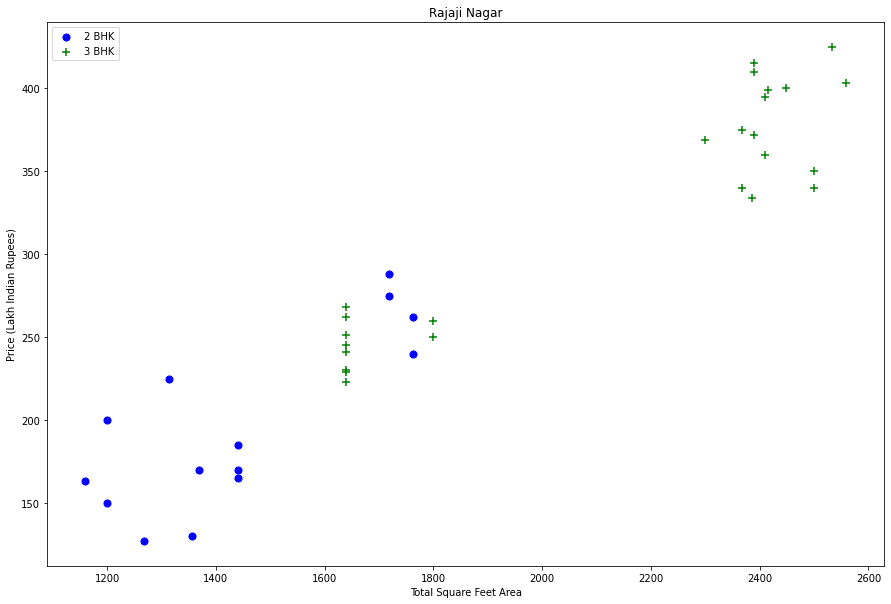

In [57]:
plot_scatter_chart(df8,"Rajaji Nagar")

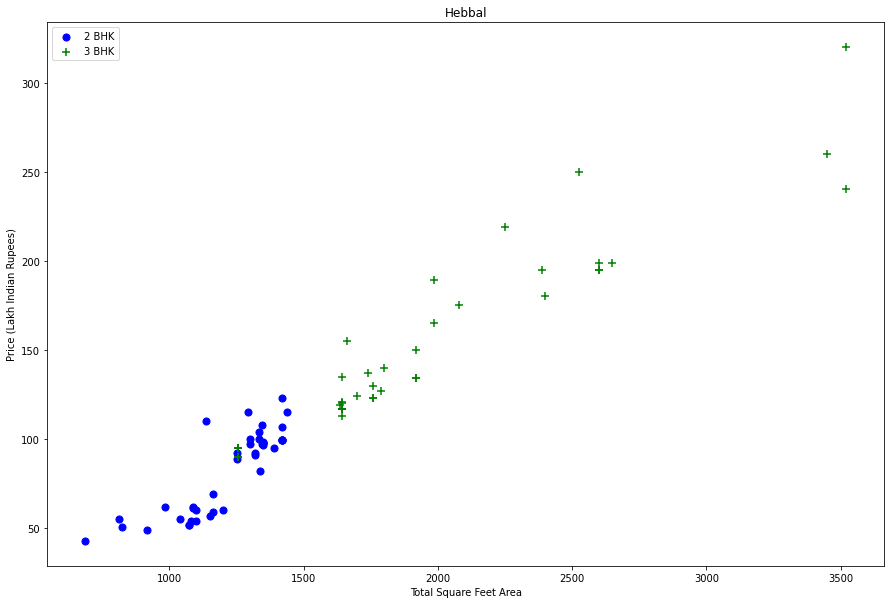

In [58]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

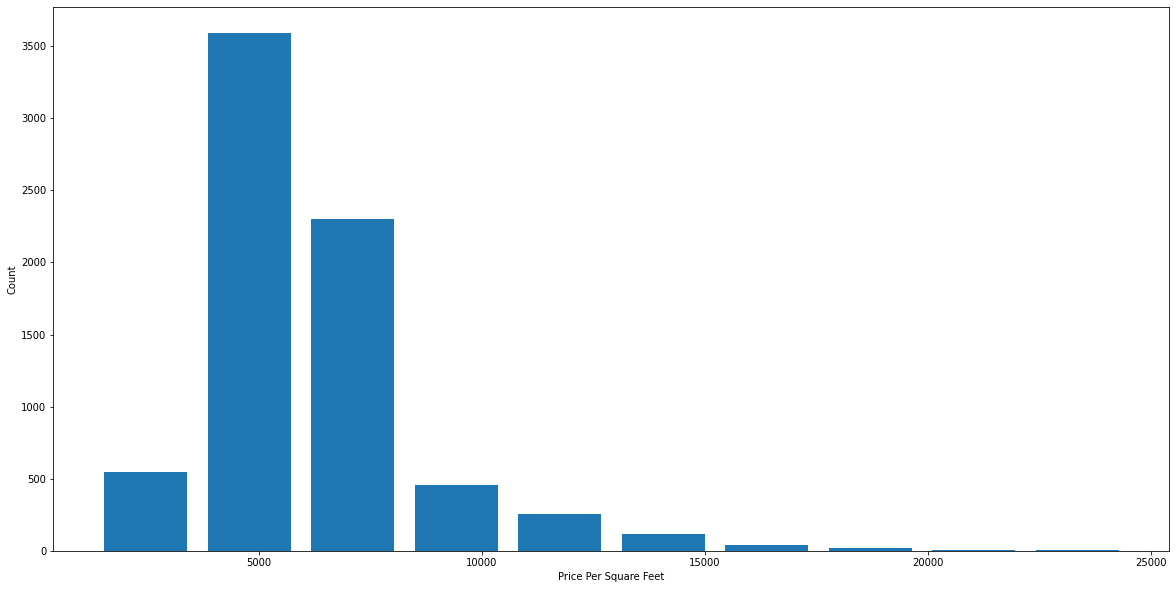

In [59]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# Outlier Removal using Bathrooms feature

In [60]:
df8.bath.unique

<bound method Series.unique of 0        4.0
1        3.0
2        2.0
3        2.0
4        2.0
        ... 
10232    2.0
10233    1.0
10236    2.0
10237    1.0
10240    5.0
Name: bath, Length: 7329, dtype: float64>

Text(0, 0.5, 'Count')

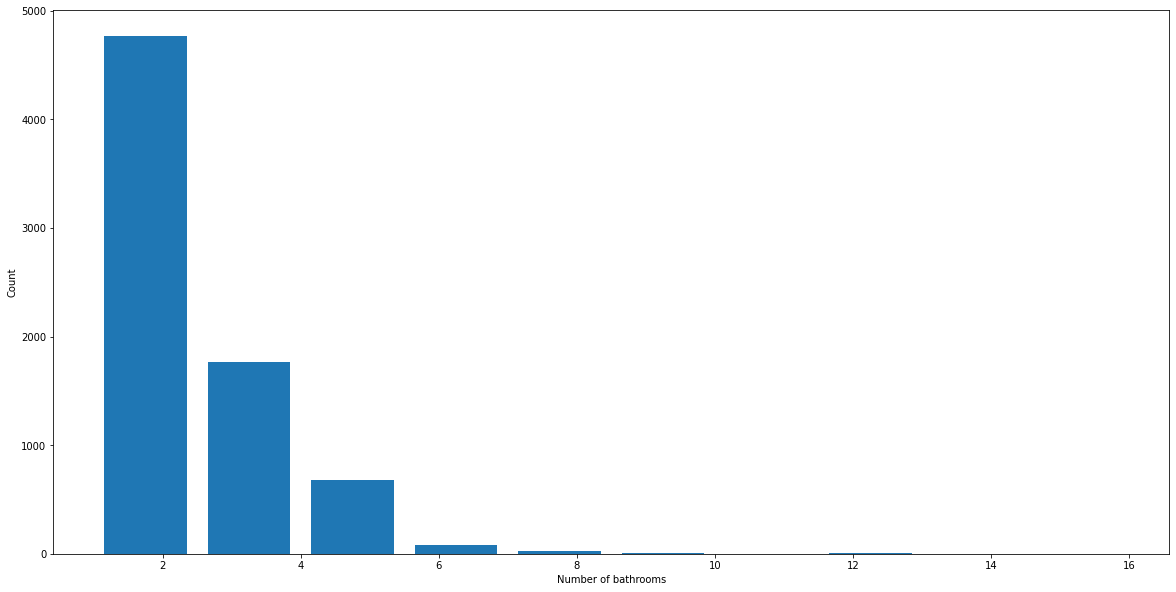

In [61]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [62]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [63]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [64]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [65]:
df9.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667
10,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525


In [66]:
df10 = df9.drop(['price_per_sqft','size'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Use One Hot Encoding For Location

In [69]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df12 = df11.drop('location', axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df12.shape

(7251, 245)

In [78]:
X = df12.drop(['price'], axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
X.shape

(7251, 244)

In [76]:
Y = df12.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [80]:
Y.shape #len(Y)

(7251,)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [83]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.8746160116851858

Use K Fold cross validation to measure accuracy of our LinearRegression model

In [85]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.87461601, 0.81773925, 0.87765704, 0.85082205, 0.81022729])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

# Find best model using GridSearchCV

In [89]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y) #Fit for testing data into trained model
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

c:\users\a\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\users\a\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

c:\users\a\appdata\local\programs\python\python38\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.723413,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
lasso() #shift+tab

Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

In [99]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [108]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0] #Gives the index of location given in function, checking in X.columns

    x = np.zeros(len(X.columns)) #Fill zeroes in place of 244 X.columns
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [109]:
location = '1st Phase JP Nagar'
loc_index = np.where(X.columns==location)[0][0]
print(loc_index)

4


In [110]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\users\a\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.93008793914893

In [111]:
print(predict_price)

<function predict_price at 0x000001B8F8E9FDC0>


In [112]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

c:\users\a\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


76.68653201182042

In [113]:
predict_price('Indira Nagar',1000, 2, 2)

c:\users\a\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


78.93008793914893

In [107]:
predict_price('Indira Nagar',1000, 3, 3)

116


c:\users\a\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


149.22840447509824